In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Clean_Dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


The various features of the dataset are explained below:

Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

Price: Target variable stores information of the ticket price.


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [67]:
df = data.copy()

df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('flight', axis = 1, inplace = True)

df.dropna(inplace = True)
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [68]:
# How many times did each airline arrive at Night?
sel = df[['airline', 'arrival_time']]
sel = sel.loc[sel.arrival_time == 'Night']
sel = sel.groupby('airline')[['arrival_time']].count().sort_values(by = 'arrival_time', ascending = False)
sel

,arrival_time
airline,
Vistara,40693
Air_India,24552
Indigo,12701
GO_FIRST,7053
AirAsia,3477
SpiceJet,3062


Text(0.5, 1.0, 'Price of all SpiceJet airline in Mumbai and Hyderabad')

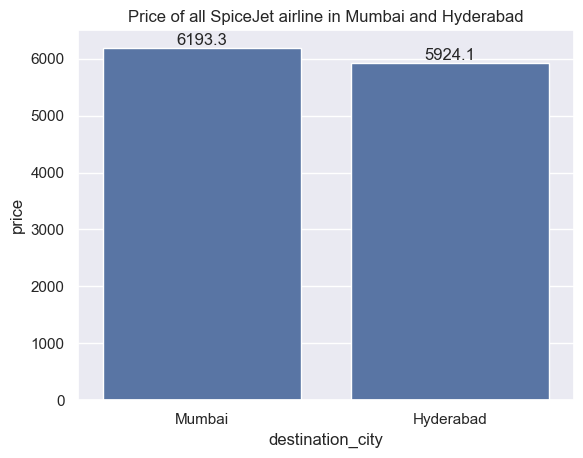

In [69]:
# Create a dataframe showing only the airline and the Price of all 'SpiceJet' in destination_city (Mumbai and Hyderabad).
sel = data[['airline', 'price', 'destination_city']]
sel = sel.loc[(sel.airline == 'SpiceJet') & ((sel.destination_city == 'Mumbai') | (sel.destination_city == 'Hyderabad'))]

fig = sns.barplot(x = sel.destination_city, y = sel.price, ci = 0)
fig.bar_label(fig.containers[0], fmt = '%.1f')
plt.title('Price of all SpiceJet airline in Mumbai and Hyderabad')

Text(0.5, 1.0, 'Most Expensive Airline')

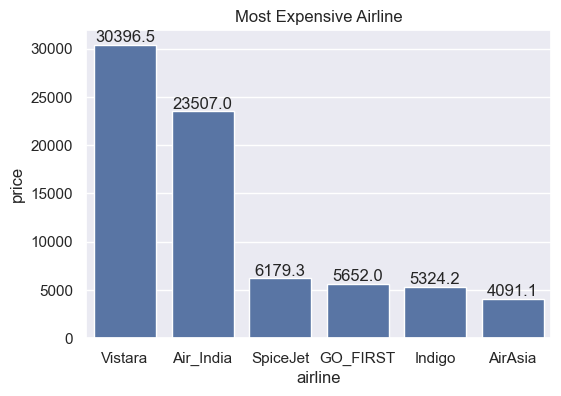

In [70]:
# What airline is the most expensive?
sel = df[['airline', 'price']]
sel = sel.groupby('airline')[['price']].mean().sort_values(by = 'price', ascending = False)
# sel

plt.figure(figsize = (6,4))
fig = sns.barplot(x = sel.index, y = sel.price, ci =0)
fig.bar_label(fig.containers[0], fmt = '%.1f')
plt.title('Most Expensive Airline')

In [71]:
categorical = df.select_dtypes(exclude = 'number')
numerical = df.select_dtypes(include = 'number')

print(f"\t\t\t\t\tCategorical data")
display(categorical.head(3))

print(f"\n\n\t\t\t\t\tNumerical data")
display(numerical.head(3))

					Categorical data


,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy




					Numerical data


,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956


In [72]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [73]:
# PREPROCESSSING
# Standardization
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

for i in numerical.columns: # ................................................. Select all numerical columns
    if i in df.drop('price', axis = 1).columns: # ...................................................... If the selected column is found in the general dataframe
        df[i] = scaler.fit_transform(df[[i]]) # ................................ Scale it

for i in categorical.columns: # ............................................... Select all categorical columns
    if i in df.drop('price', axis = 1).columns: # ...................................................... If the selected columns are found in the general dataframe
        df[i] = encoder.fit_transform(df[i])# .................................. encode it

y = df['price']
x = df.drop('price', axis = 1)

df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,-1.397531,-1.843875,5953
1,4,2,1,2,4,5,1,-1.375284,-1.843875,5953
2,0,2,1,2,1,5,1,-1.397531,-1.843875,5956
3,5,2,4,2,0,5,1,-1.386407,-1.843875,5955
4,5,2,4,2,4,5,1,-1.375284,-1.843875,5955


<Axes: >

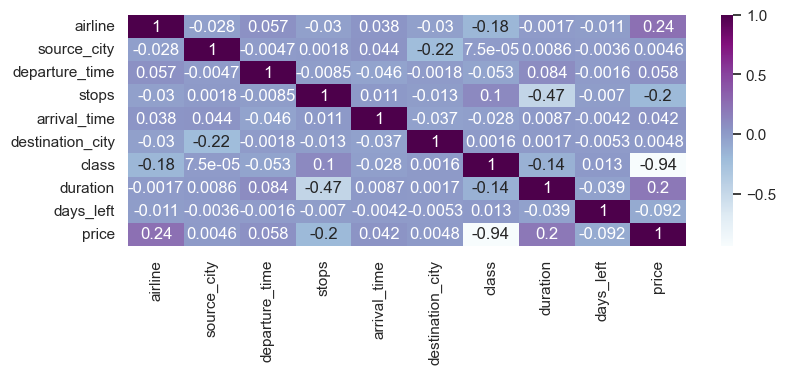

In [74]:
# Assumption of Multicolinearity
plt.figure(figsize = (9, 3))
sns.heatmap(df.corr(), annot = True, cmap = 'BuPu')

In [75]:
# Train And Test Split
x = df.drop('price', axis = 1)
y = df.price

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80, random_state = 69)
print(f'xtrain: {xtrain.shape}')
print(f'ytrain: {ytrain.shape}')
print(f'xtest: {xtest.shape}')
print(f'ytest: {ytest.shape}')

xtrain: (240122, 9)
ytrain: (240122,)
xtest: (60031, 9)
ytest: (60031,)


In [76]:
train_set = pd.concat([xtrain, ytrain], axis = 1)
test_set = pd.concat([xtest, ytest], axis = 1)

print(f'\t\tTrain DataSet')
display(train_set.head())
print(f'\n\t\tTest DataSet')
display(test_set.head())

		Train DataSet


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
243097,5,5,0,0,5,1,0,-0.725950,-0.147832,61933
286951,5,3,0,0,4,1,0,1.487625,0.737059,41314
43732,0,5,0,0,5,2,1,-0.424225,-1.475170,5939
43504,5,5,2,0,0,2,1,1.035733,-1.622652,14553
217500,1,2,2,0,4,4,0,0.884176,-0.000350,47545



		Test DataSet


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
121814,2,4,2,0,4,2,1,0.340515,-0.737760,6488
149965,5,4,5,0,2,1,1,1.070494,-0.295314,11876
291461,5,1,5,0,0,5,0,0.455921,-0.516537,61873
225955,5,5,1,0,0,2,0,-0.702312,-1.106465,53152
209721,5,2,4,0,5,5,0,0.212595,0.220873,53164


In [77]:
# --------- Modelling ----------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(xtrain, ytrain) # --------------------------Create a linear regression model

# -------------- cross validation -------------
cross_validate = lin_reg.predict(xtrain)
score = r2_score(cross_validate, ytrain)
print(f'The Cross Validation Score is: {score.round(2)}')


The Cross Validation Score is: 0.89


In [78]:
# Model Metrics and Testing
test_prediction = lin_reg.predict(xtest)
score = r2_score(test_prediction, ytest)
print(f'The Cross Validation Score is: {score.round(2)}')

The Cross Validation Score is: 0.89


In [79]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [80]:
# save model
pickle.dump(lin_reg, open('Model.pkl', "wb"))
print('\nModel is saved\n')


Model is saved

